# 知识问答：

1.为什么我们需要动态规划？动态规划和以前谈过的“搜索”问题有什么区别？

答：动态规划是解决最优化问题的，加快找到最优子结构的速度。
每个阶段只有一个状态->递推；

每个阶段的最优状态都是由上一个阶段的最优状态得到的->贪心；

每个阶段的最优状态是由之前所有阶段的状态的组合得到的->搜索；

每个阶段的最优状态可以从之前某个阶段的某个或某些状态直接得到而不管之前这个状态是如何得到的->动态规划。

2.为什么我们还需要动态规划？ 为什么我们不训练机器学习以适应能够根据输入获得“正确”答案的功能？

答：举一个迷宫的例子。在计算从起点到终点的最短路线时，你不能只保存当前阶段的状态，因为题目要求你最短，所以你必须知道之前走过的所有位置。因为即便你当前再的位置不变，之前的路线不同会影响你的之后走的路线。这时你需要保存的是之前每个阶段所经历的那个状态，根据这些信息才能计算出下一个状态。
每个阶段的状态或许不多，但是每个状态都可以转移到下一阶段的多个状态，所以解的复杂度就是指数的，因此时间复杂度也是指数的。刚刚提到的之前的路线会影响到下一步的选择，这个令人不开心的情况就叫做有后效性。

如何解决以上暴力搜索的情况，降低计算复杂度呢？动态规划可以很好的解决这个问题。

机器学习是：如何 从观测数据（样本）中寻找规律，并利用学习到的规律（模型）对未知或无法观测的数据进行预测。我不知道拿什么样的数值型数据用作这样的训练。而其也不满足动态规划的特点。

3.你能提出至少3个可以通过动态规划解决的问题吗？

答：最优路径问题、字符串相似度/编辑距离、最长公共子序列、硬币找零问题、瓷砖覆盖问题等。

4.你可以讲出编辑距离来解决至少3个可能解决的问题吗？

答：子串匹配、最长公共子序列、相似度去重、文本纠错等

5.请总结动态规划的三个主要特征，并对每个特征做一个简明的解释。

答：
最优子结构性质。如果问题的最优解所包含的子问题的解也是最优的，我们就称该问题具有最优子结构性质（即满足最优化原理）。最优子结构性质为动态规划算法解决问题提供了重要线索。

无后效性。即子问题的解一旦确定，就不再改变，不受在这之后、包含它的更大的问题的求解决策影响。

子问题重叠性质。子问题重叠性质是指在用递归算法自顶向下对问题进行求解时，每次产生的子问题并不总是新问题，有些子问题会被重复计算多次。动态规划算法正是利用了这种子问题的重叠性质，对每一个子问题只计算一次，然后将其计算结果保存在一个表格中，当再次需要计算已经计算过的子问题时，只是在表格中简单地查看一下结果，从而获得较高的效率。

6.动态规划的缺点是什么？ （您可能需要在Internet上自己搜索）

答：
1. 没有统一的标准模型；

2. 数值方法求解时存在维数灾。

3.可能会因递归层数太深导致栈溢出，函数调用带来额外时间开销。

# 装饰器、动态规划寻找最优解、编辑距离

通过卖钢筋利益最大化问题引入动态规划问题：

In [3]:
original_price = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30, 35]

In [4]:
from collections import defaultdict

In [5]:
price = defaultdict(int)

In [6]:
for i,p in enumerate(original_price):
    price[i+1] = p
print(price)

defaultdict(<class 'int'>, {1: 1, 2: 5, 3: 8, 4: 9, 5: 10, 6: 17, 7: 17, 8: 20, 9: 24, 10: 30, 11: 35})


In [7]:
price[11]

35

## Get the max splitting by enumerate

In [8]:
max(1, 2, 3, 4)

4

In [9]:
def example(f, arg):
    return f(arg)

In [10]:
def add_ten(num):
    return num + 10

In [11]:
def mul_ten(num):
    return num * 10 

In [12]:
operations = [add_ten, mul_ten]

for f in operations:
    print(f)  #f为add_ten、mul_ten两个函数  
    print(example(f, 100))  #打印的是 example(add_ten, 100) 和 example(mul_ten, 100)

<function add_ten at 0x00000225F2F77C80>
110
<function mul_ten at 0x00000225F2F867B8>
1000


In [13]:
#查看r(n)调用了多少次
called_time = defaultdict(int)

def get_call_times(f):
    result = f()
    print('function: {} called once! '.format(f.__name__))
    called_time[f.__name__] += 1
    
    return result

In [14]:
def some_funcion_1():
    print('I am function 1')

In [28]:
get_call_times(some_funcion_1)

I am function 1
function: some_funcion_1 called once! 


In [29]:
called_time

defaultdict(int, {'some_funcion_1': 2})

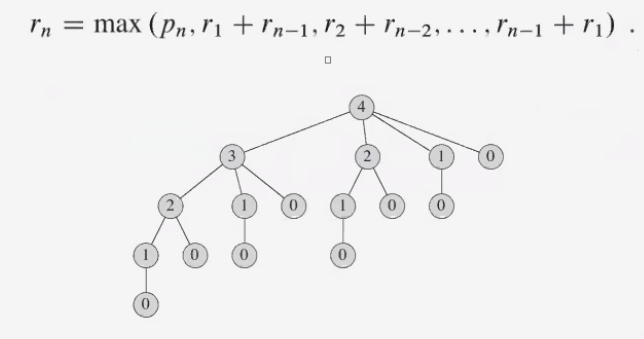

In [22]:
call_time_with_arg = defaultdict(int)

In [33]:
def r(n):
#     fname = r.__name__             
#     call_time_with_arg[(fname, n)] += 1
    
    return max(
        [price[n]] + [r(i) + r(n-i) for i in range(1, n)]
    )

In [30]:
from collections import Counter

In [38]:
Counter(call_time_with_arg).most_common() #统计调用次数

[(('r', 1), 13122),
 (('r', 2), 4374),
 (('r', 3), 1458),
 (('r', 4), 486),
 (('r', 5), 162),
 (('r', 6), 54),
 (('r', 7), 18),
 (('r', 8), 6),
 (('r', 9), 2),
 (('r', 10), 1)]

In [34]:
r(10)  #随着n越大，计算量越大

30

# 装饰器

In [43]:
del call_time_with_arg

In [62]:
from functools import wraps

In [66]:
called_time_with_arg = defaultdict(int)

def get_call_time(f):
    """@param f is a function"""
    @wraps(f)
    def wrap(n):
        """Haha I am warp"""
        print('I can count')
        result = f(n)
        called_time_with_arg[(f.__name__, n)] += 1
        return result
    return wrap

In [67]:
def add_ten(n): return n + 10

In [68]:
add_ten(10)

20

In [69]:
add_ten = get_call_time(add_ten) #可以简写如下

In [70]:
@get_call_time 
def add_twenty(n): 
    return n + 20

In [71]:
add_twenty = get_call_time(add_twenty)

In [72]:
add_twenty(9)

I can count
I can count


29

# Dynamic Programming 
不断查表的意思

分析子问题的重复性

子问题进行存储

Solution 要进行解析

In [73]:
called_time_with_arg = defaultdict(int)

In [74]:
solution = {}

In [81]:
memo.already_computed = {}

In [80]:
#@get_call_time
@memo
def r(n):
    """
    Args: n is the iron length
    Return: the max revenue 
    """
    max_price, max_split = max(
        [(price[n], 0)] + [(r(i) + r(n-i), i) for i in range(1, n)], key=lambda x: x[0]
    )

    solution[n] = (n - max_split, max_split)
    
    return max_price

In [79]:
def memo(f): 
    memo.already_computed = {}
    @wraps(f)
    def _wrap(arg):
        result = None
        
        if arg in memo.already_computed: 
            result = memo.already_computed[arg]
        else:
            result = f(arg)
            memo.already_computed[arg] = result
        
        return result
    
    return _wrap

In [89]:
r(38)

118

In [88]:
solution

{1: (1, 0),
 2: (2, 0),
 3: (3, 0),
 4: (2, 2),
 5: (3, 2),
 6: (6, 0),
 7: (6, 1),
 8: (6, 2),
 9: (6, 3),
 10: (10, 0),
 11: (11, 0),
 12: (11, 1),
 13: (11, 2),
 14: (11, 3),
 15: (13, 2),
 16: (14, 2),
 17: (11, 6),
 18: (17, 1),
 19: (17, 2),
 20: (17, 3),
 21: (11, 10),
 22: (11, 11),
 23: (22, 1),
 24: (22, 2),
 25: (22, 3),
 26: (24, 2),
 27: (25, 2),
 28: (22, 6),
 29: (28, 1),
 30: (28, 2),
 31: (28, 3),
 32: (22, 10),
 33: (22, 11),
 34: (33, 1),
 35: (33, 2),
 36: (33, 3),
 37: (35, 2),
 38: (36, 2),
 39: (33, 6),
 40: (39, 1),
 41: (39, 2),
 42: (39, 3),
 43: (33, 10),
 44: (33, 11),
 45: (44, 1),
 46: (44, 2),
 47: (44, 3),
 48: (46, 2),
 49: (47, 2),
 50: (44, 6),
 51: (50, 1),
 52: (50, 2),
 53: (50, 3),
 54: (44, 10),
 55: (44, 11),
 56: (55, 1),
 57: (55, 2),
 58: (55, 3),
 59: (57, 2),
 60: (58, 2),
 61: (55, 6),
 62: (61, 1),
 63: (61, 2),
 64: (61, 3),
 65: (55, 10),
 66: (55, 11),
 67: (66, 1),
 68: (66, 2),
 69: (66, 3),
 70: (68, 2),
 71: (69, 2),
 72: (66, 6),


In [87]:
def parse_solution(n):
    left_split, right_split = solution[n]
    
    if right_split == 0: return [left_split]
    
    return parse_solution(left_split) + parse_solution(right_split)

In [85]:
r(234)

743

In [90]:
parse_solution(234)

[11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 3]

# 编辑距离
##动态规划之编辑距离

#functools.lru_cache的作用主要是用来做缓存，它能把相对耗时的函数结果进行保存，避免传入相同的参数重复计算。同时，缓存并不会无限增长，不用的缓存会被释放。

In [1]:
from functools import lru_cache

In [11]:
solution = {}

In [12]:
@lru_cache(maxsize=2**10)
def edit_distance(string1, string2):
    
    if len(string1) == 0: return len(string2)
    if len(string2) == 0: return len(string1)
    
    tail_s1 = string1[-1]
    tail_s2 = string2[-1]
    
    candidates = [
        (edit_distance(string1[:-1], string2) + 1, 'DEL {}'.format(tail_s1)),  # string 1 delete tail
        (edit_distance(string1, string2[:-1]) + 1, 'ADD {}'.format(tail_s2)),  # string 1 add tail of string2
    ]
    
    if tail_s1 == tail_s2:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 0, '')
    else:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 1, 'SUB {} => {}'.format(tail_s1, tail_s2))

    candidates.append(both_forward)
    print(candidates)
    min_distance, operation = min(candidates, key=lambda x: x[0])
    
    solution[(string1, string2)] = operation 
    
    return min_distance

In [13]:
edit_distance('人工智能', '人工智障')

[(2, 'DEL 人'), (2, 'ADD 人'), (0, '')]
[(3, 'DEL 人'), (1, 'ADD 工'), (2, 'SUB 人 => 工')]
[(4, 'DEL 人'), (2, 'ADD 智'), (3, 'SUB 人 => 智')]
[(5, 'DEL 人'), (3, 'ADD 障'), (4, 'SUB 人 => 障')]
[(1, 'DEL 工'), (3, 'ADD 人'), (2, 'SUB 工 => 人')]
[(2, 'DEL 工'), (2, 'ADD 工'), (0, '')]
[(3, 'DEL 工'), (1, 'ADD 智'), (2, 'SUB 工 => 智')]
[(4, 'DEL 工'), (2, 'ADD 障'), (3, 'SUB 工 => 障')]
[(2, 'DEL 智'), (4, 'ADD 人'), (3, 'SUB 智 => 人')]
[(1, 'DEL 智'), (3, 'ADD 工'), (2, 'SUB 智 => 工')]
[(2, 'DEL 智'), (2, 'ADD 智'), (0, '')]
[(3, 'DEL 智'), (1, 'ADD 障'), (2, 'SUB 智 => 障')]
[(3, 'DEL 能'), (5, 'ADD 人'), (4, 'SUB 能 => 人')]
[(2, 'DEL 能'), (4, 'ADD 工'), (3, 'SUB 能 => 工')]
[(1, 'DEL 能'), (3, 'ADD 智'), (2, 'SUB 能 => 智')]
[(2, 'DEL 能'), (2, 'ADD 障'), (1, 'SUB 能 => 障')]


1

In [14]:
solution

{('人', '人'): '',
 ('人', '人工'): 'ADD 工',
 ('人', '人工智'): 'ADD 智',
 ('人', '人工智障'): 'ADD 障',
 ('人工', '人'): 'DEL 工',
 ('人工', '人工'): '',
 ('人工', '人工智'): 'ADD 智',
 ('人工', '人工智障'): 'ADD 障',
 ('人工智', '人'): 'DEL 智',
 ('人工智', '人工'): 'DEL 智',
 ('人工智', '人工智'): '',
 ('人工智', '人工智障'): 'ADD 障',
 ('人工智能', '人'): 'DEL 能',
 ('人工智能', '人工'): 'DEL 能',
 ('人工智能', '人工智'): 'DEL 能',
 ('人工智能', '人工智障'): 'SUB 能 => 障'}

编辑距离（Edit Distance），又称Levenshtein距离，是指两个字串之间，由一个转成另一个所需的最少编辑操作次数。许可的编辑操作包括将一个字符替换成另一个字符，插入一个字符，删除一个字符。每进行一次操作，计数+1。

将S和T变为同一个字符串的最小计数即为它们的距离。给出相应算法。

解法：
　　
  将S和T的长度分别记为len(S)和len(T)，并把S和T的距离记为m[len(S)][len(T)]，有以下几种情况：

如果末尾字符相同，那么m[len(S)][len(T)]=m[len(S)-1][len(T)-1]；

如果末尾字符不同，有以下处理方式
　　
  修改S或T末尾字符使其与另一个一致来完成，m[len(S)][len(T)]=m[len(S)-1][len(T)-1]+1；
　　
  在S末尾插入T末尾的字符，比较S[1...len(S)]和S[1...len(T)-1]；
　　
  在T末尾插入S末尾的字符，比较S[1...len(S)-1]和S[1...len(T)]；
　　
  删除S末尾的字符，比较S[1...len(S)-1]和S[1...len(T)]；
　　
  删除T末尾的字符，比较S[1...len(S)]和S[1...len(T)-1]；
　　
  总结为，对于i>0,j>0的状态(i,j),m[i][j] = min( m[i-1][j-1]+(s[i]==s[j])?0:1 , m[i-1][j]+1, m[i][j-1] +1)。
　　
  这里的重叠子结构是S[1...i]，T[1...j]。

# #Python中的Levenshtein包可以方便的计算编辑距离

Levenshtein.distance(str1, str2)

计算编辑距离（也成Levenshtein距离）。是描述由一个字串转化成另一个字串最少的操作次数，在其中的操作包括插入、删除、替换。算法实现：动态规划。
Levenshtein.hamming(str1, str2)

计算汉明距离。要求str1和str2必须长度一致。是描述两个等长字串之间对应位置上不同字符的个数。
Levenshtein.ratio(str1, str2)

计算莱文斯坦比。计算公式  r = (sum – ldist) / sum, 其中sum是指str1 和 str2 字串的长度总和，ldist是类编辑距离。注意这里是类编辑距离，在类编辑距离中删除、插入依然+1，但是替换+2。

Levenshtein.jaro(s1, s2)
计算jaro距离，Jaro Distance据说是用来判定健康记录上两个名字是否相同，也有说是是用于人口普查。

代码如下：

In [18]:
# -*- coding:utf-8 -*-
import Levenshtein
texta = u'人工智能'
textb = u'人工智障'
print(Levenshtein.distance(texta,textb))  

print(Levenshtein.hamming(texta,textb))

print(Levenshtein.ratio(texta,textb))

print(Levenshtein.jaro(texta,textb))

1
1
0.75
0.8333333333333334


In [17]:
!pip install python-Levenshtein

  Running setup.py bdist_wheel for python-Levenshtein: started
  Running setup.py bdist_wheel for python-Levenshtein: finished with status 'done'
  Stored in directory: C:\Users\Awen\AppData\Local\pip\Cache\wheels\de\c2\93\660fd5f7559049268ad2dc6d81c4e39e9e36518766eaf7e342
Successfully built python-Levenshtein


You are using pip version 9.0.1, however version 19.2.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.
